### Project: 멋진 챗봇 만들기

In [198]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import nltk
import gensim
import re
from konlpy.tag import Mecab
print(numpy.__version__)

print(tensorflow.__version__)
print(nltk.__version__)
print(gensim.__version__)### Project: 멋진 챗봇 만들기

1.21.4
2.6.0
3.6.5
3.8.3


In [ ]:
!unzip ./ko.zip

### Step 1. 데이터 로드

In [116]:
df = pd.read_csv("~/data/ChatbotData.csv")

# Assuming your CSV file has "Q" and "A" columns for questions and answers
questions = df["Q"].tolist()
answers = df["A"].tolist()
print(len(df))

11823


In [117]:
questions[:10]

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨']

In [118]:
answers[:10]

['하루가 또 가네요.',
 '위로해 드립니다.',
 '여행은 언제나 좋죠.',
 '여행은 언제나 좋죠.',
 '눈살이 찌푸려지죠.',
 '다시 새로 사는 게 마음 편해요.',
 '다시 새로 사는 게 마음 편해요.',
 '잘 모르고 있을 수도 있어요.',
 '시간을 정하고 해보세요.',
 '시간을 정하고 해보세요.']

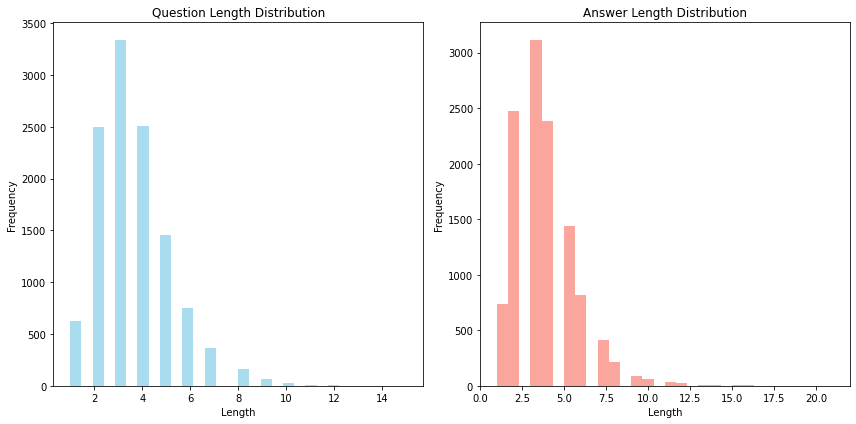

In [119]:
import matplotlib.pyplot as plt

# "Q"와 "A" 열의 길이를 측정합니다.
question_lengths = df["Q"].str.split().apply(len)
answer_lengths = df["A"].str.split().apply(len)

# 히스토그램을 그리기 위해 데이터의 분포를 시각화합니다.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(question_lengths, bins=30, color='skyblue', alpha=0.7)
plt.title('Question Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(answer_lengths, bins=30, color='salmon', alpha=0.7)
plt.title('Answer Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [120]:
#중복 데이터 제거
raw = zip(questions, answers)
cleaned_corpus = set(raw)

In [121]:
len(cleaned_corpus)

11750

### Step 2. 데이터 정제

In [122]:
# Q. 전처리 함수를 만들어 보세요. 아래 기능을 추가해주세요.
def preprocess_sentence(sentence): # [[YOUR CODE]]
    sentence = sentence.lower().strip()
    sentence = re.sub(r"[^a-zA-Z?.!가-힣ㄱ-ㅎㅏ-ㅣ]+", " ", sentence)
    #sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = sentence.strip()
    return  sentence

In [123]:
# 전처리 적용
source_sentences = []
target_sentences = []

for q_sent, a_sent in cleaned_corpus:
    source_sentences.append(preprocess_sentence(q_sent))
    target_sentences.append(preprocess_sentence(a_sent))

In [124]:
source_sentences[:10]

['좋아하는 여자가 최근들어 연락이 늦는데 나한테 마음이 없는거겠지.',
 '참지 못하고 또 친추를 하고',
 '취업준비하는데 연애해도 될까?',
 '바람 쐬러 나갈까',
 '선택 장애 있는 거 같아',
 '사랑하고 싶은데 내가 자꾸 구속해',
 '여자들이 싫어하는 남자들 특징 좀 알려주세요.',
 '얼굴 엄청 작은 거 부러워',
 '학교폭력 당하고 있어',
 '야구 경기 보러 꼭 함께 가자던 그 남자']

In [125]:
target_sentences[:10]

['바쁠 수도 있지만 그럴 확률이 크겠네요.',
 '후회할 거예요.',
 '옆에서 응원해주면서 사랑을 키워다고 좋을 거예요.',
 '같이 가요.',
 '선택할 때 힘든 건 당연해요.',
 '사랑을 독차지하려 하지 말고 내려놓으면서 여유를 가지세요.',
 '난폭한게 가장 싫을 거예요.',
 '얼굴이 다가 아니에요.',
 '부모님이나 선생님께 도움을 청해보세요.',
 '더 좋은 사람이랑 가세요.']

### Step 3. 데이터 토큰화

토큰화에는 KoNLPy의 mecab 클래스를 사용합니다.

아래 조건을 만족하는 build_corpus() 함수를 구현하세요!

- 소스 문장 데이터와 타겟 문장 데이터를 입력으로 받습니다.
- 데이터를 앞서 정의한 preprocess_sentence() 함수로 정제하고, 토큰화합니다.
- 토큰화는 전달받은 토크나이즈 함수를 사용합니다. 이번엔 mecab.morphs 함수를 전달하시면 됩니다.
- 토큰의 개수가 일정 길이 이상인 문장은 데이터에서 제외합니다.
- 중복되는 문장은 데이터에서 제외합니다. 소스 : 타겟 쌍을 비교하지 않고 소스는 소스대로 타겟은 타겟대로 검사합니다. 중복 쌍이 흐트러지지 않도록 유의하세요!


구현한 함수를 활용하여 questions 와 answers 를 각각 que_corpus , ans_corpus 에 토큰화하여 저장합니다.



In [207]:

from konlpy.tag import Mecab


def tokenize(corpus, vocab_size=50000):
    mecab = Mecab()
    morph = [" ".join(mecab.morphs(sen)) for sen in corpus]
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',
                                                     num_words=vocab_size)
    tokenizer.fit_on_texts(morph)

    tensor = tokenizer.texts_to_sequences(morph)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

        
    return tensor, tokenizer, morph

In [204]:
# def build_corpus(source_sentences, target_sentences, tokenize_function):
#     # 필터링하여 청소된 코퍼스를 생성합니다.
#     max_token_length = 10

#     que_corpus = []
#     ans_corpus = []
#     for idx, node in enumerate(source_sentences):
#         questions_tokens = tokenize_function(source_sentences[idx]) 
#         answers_tokens = tokenize_function(target_sentences[idx]) 

#         # 한국어와 영어 문장 모두 토큰 길이가 max_token_length 이하인지 확인
#         if (len(questions_tokens) <= max_token_length) and len(answers_tokens) <= max_token_length:
#             que_corpus.append(" ".join(questions_tokens))
#             ans_corpus.append(" ".join(answers_tokens))
#     return que_corpus, ans_corpus

def build_corpus(que_data, ans_data, max_len=40):
    print('questions data size :', len(questions))
    print('answers data size :', len(answers))
    print()
    print('##### sample checking #####')
    for i in range(10):
        print('Q :', questions[i])
        print('A :', answers[i])    
        print()
    
    que_tensor, que_tokenizer, _ = tokenize(questions)
    ans_tensor, ans_tokenizer, _ = tokenize(answers)
    
    que_corpus = []
    ans_corpus = []
    for q, a in zip(que_tensor, ans_tensor):
        if (len(q) <= max_len) or (len(a) <= max_len):
            que_corpus.append(q)
            ans_corpus.append(a)
    
    print('questions token size :', len(que_corpus))
    print('answers token size :', len(ans_corpus))
    return que_corpus, ans_corpus, que_tokenizer, ans_tokenizer

In [152]:
#토큰화에는 KoNLPy의 mecab 클래스를 사용
tokenizer = Mecab()
que_corpus, ans_corpus = build_corpus(
    source_sentences, 
    target_sentences,
    tokenizer.morphs
)

In [153]:
que_corpus[:10]

['참 지 못하 고 또 친 추 를 하 고',
 '바람 쐬 러 나갈까',
 '선택 장애 있 는 거 같 아',
 '얼굴 엄청 작 은 거 부러워',
 '야구 경기 보 러 꼭 함께 가 자던 그 남자',
 '골프 배워야 돼',
 '자기 잘못 인정 안 하 는 사람',
 '남편 이 왜 애 키우 는 거 안 도와줄까',
 '이 별 한지 일 째',
 '쓰레기 새끼']

In [154]:
ans_corpus[:10]

['후회 할 거 예요 .',
 '같이 가요 .',
 '선택 할 때 힘든 건 당연 해요 .',
 '얼굴 이 다가 아니 에요 .',
 '더 좋 은 사람 이랑 가 세요 .',
 '시간 내 서 가 보 세요 .',
 '피할 수 있 으면 피하 세요 .',
 '힘 빠지 는 이야기 네요 .',
 '어찌 보 면 짧 지 않 은 시간 .',
 '기분 이 좀 풀렸 길 바랍니다 .']

### Step 4. Augmentation


In [143]:
from gensim.models import Word2Vec
word2Vec = Word2Vec.load('~/aiffel/project/chatbot/ko.bin')

In [144]:
word2Vec.wv.most_similar("감사")

[('감사원', 0.5044692158699036),
 ('서무', 0.4843790531158447),
 ('도지사', 0.4654870331287384),
 ('결재', 0.46455061435699463),
 ('회계', 0.4616725444793701),
 ('자문', 0.4596004784107208),
 ('출석', 0.44367003440856934),
 ('심의', 0.44340527057647705),
 ('협의', 0.44103771448135376),
 ('청문', 0.43760183453559875)]

In [145]:
def lexical_sub(sentence, word2vec):
    import random

    res = ""
    toks = sentence.split()

    try:
        _from = random.choice(toks)
        _to = word2vec.most_similar(_from)[0][0]

    except:   # 단어장에 없는 단어
        return None

    for tok in toks:
        if tok is _from: res += _to + " "
        else: res += tok + " "

    return res

In [156]:
from tqdm import tqdm_notebook

def augment_corpus(src_corpus, tgt_corpus, wv):
    new_src_corpus = []
    new_tgt_corpus = []
    corpus_size = len(src_corpus)
    
    for i in tqdm_notebook(range(corpus_size)):
        old_src = src_corpus[i]
        old_tgt = tgt_corpus[i]

        new_src = lexical_sub(old_src, wv)
        new_tgt = lexical_sub(old_tgt, wv)
        

        if new_src: 
            new_src_corpus.append(new_src)
            new_tgt_corpus.append(old_tgt)
            
        if new_tgt: 
            new_src_corpus.append(old_src)
            new_tgt_corpus.append(new_tgt)


    return new_src_corpus, new_tgt_corpus

In [157]:
new_src_corpus, new_tgt_corpus = augment_corpus(que_corpus, ans_corpus, word2Vec)

/tmp/ipykernel_230/1816841922.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(corpus_size)):


  0%|          | 0/8112 [00:00<?, ?it/s]

/tmp/ipykernel_230/3339896393.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  _to = word2vec.most_similar(_from)[0][0]


In [160]:
print(len(new_src_corpus), len(new_tgt_corpus))

13869 13869


In [168]:
src_corpus_augmented = que_corpus + new_src_corpus
tgt_corpus_augmented = ans_corpus + new_tgt_corpus

In [169]:
print(len(src_corpus_augmented), len(tgt_corpus_augmented))

21981 21981


In [163]:
new_src_corpus_two, new_tgt_corpus_two = augment_corpus(src_corpus_augmented, tgt_corpus_augmented, word2Vec)

/tmp/ipykernel_230/1816841922.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(corpus_size)):


  0%|          | 0/21981 [00:00<?, ?it/s]

/tmp/ipykernel_230/3339896393.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  _to = word2vec.most_similar(_from)[0][0]


In [170]:
print(len(new_src_corpus_two), len(new_tgt_corpus_two))

38122 38122


In [171]:
src_corpus_augmented = src_corpus_augmented + new_src_corpus_two
tgt_corpus_augmented = tgt_corpus_augmented + new_tgt_corpus_two

In [172]:
print(len(src_corpus_augmented), len(tgt_corpus_augmented))

60103 60103


In [218]:
que_tensor, que_tokenizer, _ = tokenize(src_corpus_augmented[0])
print(type(que_tensor))

<class 'numpy.ndarray'>


In [208]:
que_corpus, ans_corpus, que_tokenizer, ans_tokenizer = build_corpus(src_corpus_augmented, tgt_corpus_augmented)

questions data size : 60103
answers data size : 60103

##### sample checking #####
Q : 참 지 못하 고 또 친 추 를 하 고
A : 후회 할 거 예요 .

Q : 바람 쐬 러 나갈까
A : 같이 가요 .

Q : 선택 장애 있 는 거 같 아
A : 선택 할 때 힘든 건 당연 해요 .

Q : 얼굴 엄청 작 은 거 부러워
A : 얼굴 이 다가 아니 에요 .

Q : 야구 경기 보 러 꼭 함께 가 자던 그 남자
A : 더 좋 은 사람 이랑 가 세요 .

Q : 골프 배워야 돼
A : 시간 내 서 가 보 세요 .

Q : 자기 잘못 인정 안 하 는 사람
A : 피할 수 있 으면 피하 세요 .

Q : 남편 이 왜 애 키우 는 거 안 도와줄까
A : 힘 빠지 는 이야기 네요 .

Q : 이 별 한지 일 째
A : 어찌 보 면 짧 지 않 은 시간 .

Q : 쓰레기 새끼
A : 기분 이 좀 풀렸 길 바랍니다 .

questions token size : 60103
answers token size : 60103


In [212]:
enc_train, enc_val, dec_train, dec_val = \
train_test_split(que_corpus, ans_corpus, test_size=0.01)

print("enc_train :", len(enc_train), "enc_val :", len(enc_val))
print("dec_train :", len(dec_train), "dec_val :",len(dec_val))

enc_train : 59501 enc_val : 602
dec_train : 59501 dec_val : 602


In [213]:
que_corpus

[array([ 134,   15,  269,    7,   96, 2155, 2156,   44,    4,    7,    0,
           0,    0,    0,    0], dtype=int32),
 array([ 495, 1915,  130, 3168,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0], dtype=int32),
 array([ 893, 1222,   29,    6,   24,   30,   11,    0,    0,    0,    0,
           0,    0,    0,    0], dtype=int32),
 array([ 415,  392, 1069,   23,   24,  560,    0,    0,    0,    0,    0,
           0,    0,    0,    0], dtype=int32),
 array([4183, 4184,   42,  130,  861,  734,    5, 4185,  153,   39,    0,
           0,    0,    0,    0], dtype=int32),
 array([1675, 4543,   73,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0], dtype=int32),
 array([ 663,  305, 1223,   19,    4,    6,   34,    0,    0,    0,    0,
           0,    0,    0,    0], dtype=int32),
 array([ 221,    1,   75,  131,  541,    6,   24,   19, 1916,    0,    0,
           0,    0,    0,    0], dtype=int32),
 array([  1, 137, 281,  54, 121,

### Step 5. 데이터 벡터화

### 모델구현

In [174]:
# Positional Encoding 구현
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, (2*(i//2)) / np.float32(d_model))

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table

In [175]:
# Mask  생성하기
def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_lookahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_enc_mask = generate_padding_mask(src)

    dec_lookahead_mask = generate_lookahead_mask(tgt.shape[1])
    dec_tgt_padding_mask = generate_padding_mask(tgt)
    dec_mask = tf.maximum(dec_tgt_padding_mask, dec_lookahead_mask)

    return enc_mask, dec_enc_mask, dec_mask

In [181]:
# Multi Head Attention 구현
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        self.depth = d_model // self.num_heads
        
        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)
        
        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b=True)

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None: scaled_qk += (mask * -1e9)  

        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        out = tf.matmul(attentions, V)

        return out, attentions
        

    def split_heads(self, x):
        bsz = x.shape[0]
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])

        return split_x

    def combine_heads(self, x):
        bsz = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))

        return combined_x

    
    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)
        
        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)
        
        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask)
                        
        out = self.combine_heads(out)
        out = self.linear(out)
            
        return out, attention_weights

In [182]:
# Position-wise Feed Forward Network 구현
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.d_model = d_model
        self.d_ff = d_ff

        self.fc1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.fc2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
            
        return out

In [183]:
# Encoder의 레이어 구현
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        '''
        Multi-Head Attention
        '''
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.do(out)
        out += residual
        
        '''
        Position-Wise Feed Forward Network
        '''
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual
        
        return out, enc_attn

In [184]:
# Decoder 레이어 구현
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)
    
    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        '''
        Masked Multi-Head Attention
        '''
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.do(out)
        out += residual

        '''
        Multi-Head Attention
        '''
        residual = out
        out = self.norm_2(out)
        # Q, K, V 순서에 주의하세요!
        out, dec_enc_attn = self.enc_dec_attn(Q=out, K=enc_out, V=enc_out, mask=dec_enc_mask)
        out = self.do(out)
        out += residual
        
        '''
        Position-Wise Feed Forward Network
        '''
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, dec_attn, dec_enc_attn

In [185]:
# Encoder 구현
class Encoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                        for _ in range(n_layers)]
    
        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        out = x
    
        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)
        
        return out, enc_attns
     

In [186]:
# Decoder 구현
class Decoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) 
                            for _ in range(n_layers)]
                            
    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        out = x
    
        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, dec_enc_mask, padding_mask)

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns
     

In [187]:
class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,
                    tgt_vocab_size,
                    pos_len,
                    dropout=0.2,
                    shared_fc=True,
                    shared_emb=False):
        super(Transformer, self).__init__()
        
        self.d_model = tf.cast(d_model, tf.float32)

        if shared_emb:
            self.enc_emb = self.dec_emb = \
            tf.keras.layers.Embedding(src_vocab_size, d_model)
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared_fc = shared_fc

        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]

        out = emb(x)

        if self.shared_fc: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out

        
    def call(self, enc_in, dec_in, enc_mask, dec_enc_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)
        
        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, dec_enc_mask, dec_mask)
        
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns

In [188]:
# Learning Rate Scheduler 구현
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()
        
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

In [189]:
# Train Step 정의
@tf.function()
def train_step(src, tgt, model, optimizer):
    tgt_in = tgt[:, :-1]  # Decoder의 input
    gold = tgt[:, 1:]     # Decoder의 output과 비교하기 위해 right shift를 통해 생성한 최종 타겟

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)

    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt_in, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss, enc_attns, dec_attns, dec_enc_attns

In [190]:
# Loss Function 정의
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [200]:
transformer = Transformer(
    n_layers=2,
    d_model=512,
    n_heads=8,
    d_ff=2048,
    src_vocab_size=len(enc_train),
    tgt_vocab_size=len(dec_train),
    pos_len=200,
    dropout=0.3,
    shared_fc=True,
    shared_emb=True)

		
d_model = 512

In [201]:
# Learning Rate 인스턴스 선언 & Optimizer 구현
learning_rate = LearningRateScheduler(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate,
                                        beta_1=0.9,
                                        beta_2=0.98, 
                                        epsilon=1e-9)
     

In [211]:
from tqdm import tqdm_notebook 

BATCH_SIZE = 64
EPOCHS = 5

for epoch in range(EPOCHS):
    total_loss = 0

    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm_notebook(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(enc_train[idx:idx+BATCH_SIZE],
                    dec_train[idx:idx+BATCH_SIZE],
                    transformer,
                    optimizer)

        total_loss += batch_loss

        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))

AttributeError: 'list' object has no attribute 'shape'